In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 선형회귀
훈련세트 X에 대한 선형 회귀 가설 $\hat{y}=h_{\theta}=\theta*x$에 대해 RMSE를 최소화하는 방향으로 진행한다.<br>
RMSE(평균제곱근오차)보다 MSE(평균제곱오차)를 최소화하는 것이 같은 결과를 내면서도 더 간단하다.

$MSE(X,h_\theta)= {1\over m}\sum_{i=1}^m({\theta^T}x^{(i)} - y^{(i)})^2$

## 정규방정식
$\hat{\theta}=(X^{T}X)^{-1}X^{T}y$

- $\hat{\theta}$는 비용함수를 최소화하는 $\theta$ 값이다.
- $y$는 $y^{(1)}$부터 $y^{(m)}$까지 포함하는 타깃 벡터이다.

In [4]:
X = 2*np.random.rand(100,1)
y = 4+3*X+np.random.randn(100,1)

(0, 2.0)

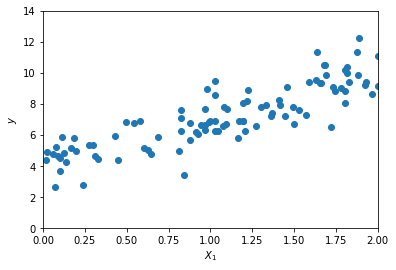

In [5]:
plt.scatter(X,y)
plt.xlabel('$X_1$')
plt.ylabel('$y$')
plt.ylim(0,14)
plt.xlim(0,2.00)

In [6]:
# 정규방정식을 사용해 theta hat을 계산 (numpy의 linalg : 선형대수 모듈)

X_b = np.c_[np.ones((100,1)),X]  # 모든 샘플에 x0=1을 추가
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[4.03309741],
       [2.94089792]])

$\theta_0 = 4, \theta_1 = 3$을 기대했는데 매우 비슷하지만 잡음이 섞여있어 정확한 값이 나오지 않는다.<br>
$\hat{\theta}$를 사용해 예측을 해보도록 한다.

In [7]:
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)),X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.03309741],
       [9.91489324]])

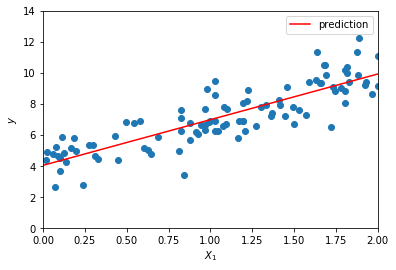

In [8]:
plt.scatter(X,y)
plt.xlabel('$X_1$')
plt.ylabel('$y$')
plt.ylim(0,14)
plt.xlim(0,2.00)
plt.plot(X_new,y_predict,'r-',label='prediction')
plt.legend()

In [9]:
# 사이킷런에서의 학습
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,y)
print(lin_reg.intercept_, lin_reg.coef_)
print(lin_reg.predict(X_new))

[4.03309741] [[2.94089792]]
[[4.03309741]
 [9.91489324]]


numpy의 연산을 이용했을 때와 완전히 동일한 결과를 얻는다.

In [10]:
# numpy의 선형대수 모듈에서 한번에 모든 것을 호출할 수 있다.
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b,y,rcond=1e-6)
theta_best_svd

array([[4.03309741],
       [2.94089792]])

이 함수는 $\hat{\theta}=X^{+}y$를 계산한다. 여기서 $X^{+}$는 X의 유사역행렬(pseudoinverse)(무어-펜로즈 역행렬)이다.<br>
np.linalg.pinv() 함수를 이용해 유사역행렬을 직접 구할 수 있다.

In [11]:
np.linalg.pinv(X_b).shape

(2, 100)

In [12]:
np.linalg.pinv(X_b).dot(y)

array([[4.03309741],
       [2.94089792]])

# 경사하강법(GD)(gradient descent)
비용함수를 최소화하기 위해 반복해서 파라미터를 조정해가는 것

파라미터 벡터 $\theta$에 대해 현재 gradient를 계산 -> gradient가 감소하는 방향으로 진행<br>
이때 step의 크기는 학습률(learning rate)로 결정된다. 너무 작으면 알고리즘이 수렴하기 위해 반복을 많이 진행하므로 시간이 오래걸리고 너무 크면 발산하게 될 위험이 있다.

경사하강법은 두 가지 문제점을 보여주는데 무작위 초기화 때문에 알고리즘이 전역 최소값(global minimum)보다 지역 최소값(local minimum)에 수렴할 가능성이 있다. 혹은 평탄한 지역이 있을 경우 그 부분을 지나기 위해 시간이 오래 걸리고 일찍 멈추게 되어 전역 최소값이 도달하지 못할 수도 있다.

다행히 선형 회귀를 위한 MSE 비용 함수는  곡선에서 어떤 두 점을 선택해 선을 그어도 곡선을 가로지르지 않는 볼록 함수(convex function)이다. 또한 연속된 함수이고 기울기가 갑자기 변하지 않는다. 이 두 사실로부터 경사하강법이 전역 최소값에 가깝게 접근할 수 있다는 것을 보장한다.

경사하강법을 적용할 때는 모든 특성이 같은 스케일을 갖도록 StandardScaler를 사용하여하며 그렇지 않으면 수렴하는데 훨씬 오래 걸리게 된다.

# 배치 경사 하강법(BGD)
다음은 비용함수의 편도함수<br>
${{\partial}\over {\partial \theta_j}}MSE(\theta) = {2 \over{m}} \sum_{i=1}^m(\theta^{T}x^{(i)}-y^{(i)})x_j^{(i)} $

비용함수의 그래디언트 벡터<br>
$\nabla_\theta = {\partial \over \partial \theta_i}MSE(\theta)$의 열벡터($i=0$부터 $n$까지) = ${2\over m} X^{T}(X\theta-y)$

매 경사 하강법 스텝에서 전체 훈련 세트 X에 대해 계산한다. 전체 훈련 세트를 사용하기 때문에 큰 훈련세트에서는 매우 느리다.

$ \theta^{(next-step)} = \theta - \eta{\nabla_\theta}MSE(\theta)$


In [13]:
# 구현
theta_path_bgd = []
eta = 0.1 # 학습률
n_iterations = 1000
m = 100   # m은 샘플의 개수

theta = np.random.randn(2,1)  # 무작위 초기화

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients
    theta_path_bgd.append(theta)
theta

array([[4.03309741],
       [2.94089792]])

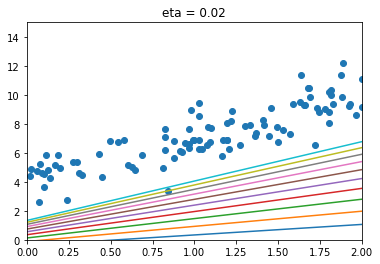

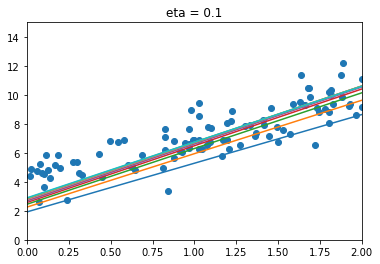

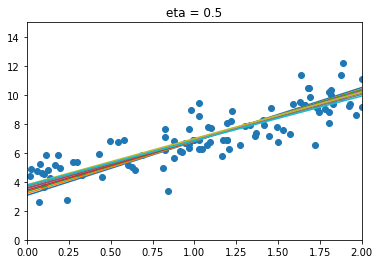

In [14]:
# 학습률 변경
etas = [0.02, 0.1, 0.5] 
n_iterations = 10
m = 100

theta = np.random.randn(2,1)

for eta in etas:
    plt.figure()
    for iteration in range(n_iterations):
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
        plt.plot(X_new,X_new_b.dot(theta))

    plt.scatter(X,y)
    plt.title('eta = {}'.format(eta))
    plt.xlim(0,2.0)
    plt.ylim(0,15)
    plt.show()

In [16]:
print(X_new.shape)
print(X_new_b.dot(theta).shape)

(2, 1)
(2, 1)


각각의 학습률로 처음 10번의 step을 보여준다.<br>
적절한 학습률을 찾기 위해서는 그리드 서치를 사용한다. 다만 반복 횟수가 너무 많으면 시간이 지나치게 오래 걸릴 수 있다. 너무 작으면 최적점에 도달하기 전에 알고리즘이 멈춰버리고 너무 크면 모델 파라미터가 더는 변하지 않는 동안 시간을 낭비하게 된다. 간단한 해결책으로 반복 횟수를 아주 크게하고 그레이디언트 벡터가 아주 작아지면 (=벡터의 노름)이 허용오차 $\epsilon$ (tolerance)보다 작아지면 알고리즘을 멈추게 한다.

이때 $\epsilon$의 범위 안에서 최적의 솔루션에 도달하기 위해서는 $O({1 \over \epsilon})$의 반복이 걸릴 수 있다. 즉 허용오차를 1/10으로 줄이면 알고리즘의 반복은 10배 늘어난다는 의미이다.

# 확률적 경사 하강법(SGD)
배치 경사 하강법의 가장 큰 문제는 매 스텝에서 전체 훈련 세트를 사용해 그레이디언트를 계산하기 때문에 큰 훈련 세트에 대해서 매우 느리다.

이와는 반대로 확률적 경사 하강법에서는 매 스텝 한 개의 샘플을 무작위로 선택하고 그 하나의 샘플에 대한 그레이디언트를 계산한다. 매 반복 시 다뤄야할 데이터가 매우 적기 때문에 알고리즘의 속도는 확연히 빨라진다.

무작위성에서는 지역 최소값에서 탈출시켜줘서 좋지만 알고리즘을 전역 최소값에 다다르지 못하게 할 수 있다는 점에서는 좋지 않다.<br> 이런 문제를 해결하기 위한 하나의 방법은 "학습률을 점진적으로 감소"시키는 것이다.
    
시작할 때는 학습률을 크게 해 수렴을 빠르게 하고 지역 최소값에 빠지지 않게 하며, 점차 작게 줄여서 알고리즘이 전역 최소값에 도달하도록 한다.

매 반복에서 학습률을 결정하는 함수를 학습 스케쥴(learning schedule)이라고 부른다. 학습률의 감소 속도도 조절할 필요가 있다.

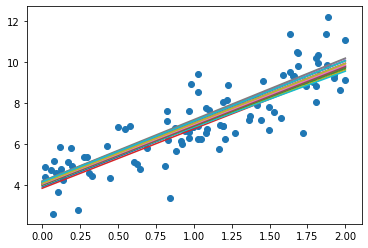

In [18]:
# 간단한 학습 스케쥴을 사용한 확률적 경사 하강법의 구현
theta_path_sgd=[]
n_epochs = 50
t0, t1 = 5, 50 # 학습 스케쥴 파라미터
m = 100  # X_b에 있는 샘플의 수

def learning_schedule(t):
    return t0/(t+t1)

theta = np.random.randn(2,1)

plt.figure()
plt.scatter(X,y)
for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2*xi.T.dot(xi.dot(theta)-yi)   # 샘플의 개수가 하나이므로 2/m 대신 2
        eta = learning_schedule(epoch*m+i)
        theta = theta - eta*gradients
    if epoch < 20:
        plt.plot(X_new,X_new_b.dot(theta))
    theta_path_sgd.append(theta)  

In [19]:
theta

array([[4.0659571 ],
       [2.96645931]])

그림은 훈련 스텝의 (불규칙하게 진행되는) 첫 20개를 보여준다. 샘플을 무작위로 선택하기 때문에 어떤 샘플은 한 에포크에서 여러 번 선택될 수 있고 어떤 샘플은 전혀 선택되지 못할 수도 있다.<br>
알고리즘이 에포크마다 모든 샘플을 사용하게 하려면 훈련 세트를 섞은 후 (입력 특성과 레이블을 동일하게 섞는다) 차례로 하나씩 선택하고 다음 에포크에서 다시 섞는 식의 방법을 사용할 수 있다.(사이킷런의 SGD 방법이 사용하는 알고리즘)

SGD를 사용하기 위해서는 훈련 샘플이 iid 가정을 만족해야한다. 이렇게 만드는 간단한 방법은 훈련하는 동안 샘플을 섞는 것이다.<br>
만약 레이블 순서대로 정렬된 샘플처럼 샘플을 섞지 않은채로 사용하면 확률적 경사 하강법이 먼저 한 레이블에 최적화되고 그다음 레이블에 최적화하는 식으로 진행된다. 즉 최적점에 도달하지 못할 가능성이 크다.

In [20]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X,y.ravel())

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.1, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty=None, power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [21]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.02662629]), array([2.98983436]))

# 미니배치 경사 하강법(mini-batch GD)
각 스텝에서 전체 훈련 세트(BGD)나 하나의 샘플(SGD)을 기반으로 그레이디언트를 계산하는 것이 아니라 미니배치라 부르는 작은 샘플에 대해서 그레이디언트를 계산한다.<br>
SGD에 비해 미니배치 경사 하강법의 주요 장점은 행렬 연산에 최적화된 하드웨어, 특히 GPU를 사용해 얻는 성능 향상이다.

특히 미니배치를 어느 정도 크게 하면 이 알고리즘은 파라미터 공간에서 SGD보다 덜 불규칙하게 움직인다. 

In [22]:
# 미니배치 사이즈를 20으로

theta_path_mgd = []

n_iterations = 50
minibatch_size = 20

np.random.seed(42)
theta = np.random.randn(2,1)  # 랜덤 초기화

t0, t1 = 200, 1000
def learning_schedule(t):
    return t0 / (t + t1)

t = 0
for epoch in range(n_iterations):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, m, minibatch_size):
        t += 1
        xi = X_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(t)
        theta = theta - eta * gradients
        theta_path_mgd.append(theta)

In [23]:
theta

array([[3.98862719],
       [2.86108801]])

In [24]:
theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)

[2.5, 4.5, 2.3, 3.9]

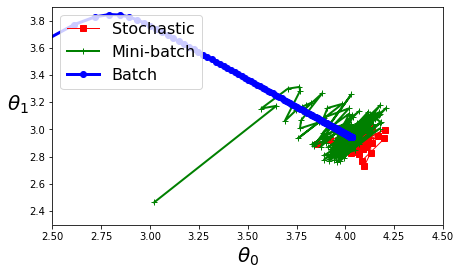

In [25]:
plt.figure(figsize=(7,4))
plt.plot(theta_path_sgd[:, 0], theta_path_sgd[:, 1], "r-s", linewidth=1, label="Stochastic")
plt.plot(theta_path_mgd[:, 0], theta_path_mgd[:, 1], "g-+", linewidth=2, label="Mini-batch")
plt.plot(theta_path_bgd[:, 0], theta_path_bgd[:, 1], "b-o", linewidth=3, label="Batch")
plt.legend(loc="upper left", fontsize=16)
plt.xlabel(r"$\theta_0$", fontsize=20)
plt.ylabel(r"$\theta_1$   ", fontsize=20, rotation=0)
plt.axis([2.5, 4.5, 2.3, 3.9])

각각의 방법에 대해 수렴하는 모양을 나타내었다.